# Energy in Spain: dataset

The "energy.csv" dataset contains timeseries regarding the power market in Spain.

Explanation of columns:
* datetime: moment at which the observation happened, in UTC (https://en.wikipedia.org/wiki/Coordinated_Universal_Time)
* power_demand: total consumption of electricity in MWh (MegaWatt-hours) [consumption]
* nuclear: total energy generated in nuclear power plants in MWh [power generation]
* gas: total energy generated in gas powered plants in MWh [power generation]
* solar: total energy generated in solar farms in MWh [power generation]
* hydro: total energy generated in hydro dams in MWh [power generation]
* coal: total energy generated in coal powered plants in MWh [power generation]
* wind: total energy generated in wind farms in MWh [power generation]
* spot_price: price at which the energy is sold (generation) or bought (consumption) in €/MWh [price]

### Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Get the data as a pandas Dataframe

In [2]:
# getting the data

energy = pd.read_csv("energy.csv")

### Calculate the following

#### Shape (1 p)

In [3]:
energy.shape

(8737, 9)

#### Create a list called "features" containing all the columns that are not "datetime" (1 p)

In [4]:
# use filter or list comprehensions or for loops or dark magic

energy_columns = energy.columns

# using filter plus lambda functions
features = list(filter(lambda col: "datetime" not in col, energy_columns))
print(features)

# using list comprehensions
features = [col for col in energy_columns if "datetime" not in col]
print(features)

# using for loop
features = []
for column in energy_columns:
    if "datetime" not in column:
        features.append(column)
print(features)

['power_demand', 'nuclear', 'gas', 'solar', 'hydro', 'coal', 'wind', 'spot_price']
['power_demand', 'nuclear', 'gas', 'solar', 'hydro', 'coal', 'wind', 'spot_price']
['power_demand', 'nuclear', 'gas', 'solar', 'hydro', 'coal', 'wind', 'spot_price']


#### How many NaN are there in the dataset? (1 p)

In [5]:
# "Dealing with missing values" in the slides

energy.isnull().sum().sum()

2541

#### Convert the "datetime" column into a Series containing datetime objects (0.5 p)

In [6]:
# pandas datetime functionalities
energy["datetime"] = pd.to_datetime(energy["datetime"], utc=True)

energy.dtypes

datetime        datetime64[ns, UTC]
power_demand                float64
nuclear                     float64
gas                         float64
solar                       float64
hydro                       float64
coal                        float64
wind                        float64
spot_price                  float64
dtype: object

#### Create the following columns (0.5 p)
* year
* month
* day
* hour
* weekday

In [7]:
# pandas datetime functionalities

energy["date"] = energy["datetime"].dt.date
energy["year"] = energy["datetime"].dt.year
energy["month"] = energy["datetime"].dt.month
energy["day"] = energy["datetime"].dt.day
energy["hour"] = energy["datetime"].dt.hour
energy["weekday"] = energy["datetime"].dt.weekday


energy.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,date,year,month,day,hour,weekday
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018-12-31,2018,12,31,23,0
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019-01-01,2019,1,1,0,1
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019-01-01,2019,1,1,1,1
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019-01-01,2019,1,1,2,1
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019-01-01,2019,1,1,3,1


#### Create a "weekend" column containing True if day is Sat/Sun or False if day is Mon/Tue/... (1 p)

In [8]:
# feature engineering
# use your already beloved (map + lambda functions)
# or list comprehensions

# using np.where
energy["weekend"] = np.where(energy["weekday"]>4, 1, 0)

#using map + lambda functions
energy["weekend"] = energy["weekday"].map(lambda x: x>4)

# using list comprehensions
energy["weekend"] = [True if wkd>4 else False for wkd in energy["weekday"]]

#### Calculate the average values per weekday for the columns in "features" list (1 p)

In [9]:
# features is the list you created in the beginning

energy.groupby("weekday").mean()[features]

,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price
weekday,,,,,,,,
0,29207.582306,6390.911769,6483.540032,1382.902420,2919.916173,1282.017737,5846.823379,49.239688
1,29760.259375,6391.128526,6716.402003,1400.603377,2870.550401,1478.384477,5795.669712,50.202580
2,29814.897436,6399.605689,6448.102244,1386.101098,2856.419471,1444.195997,6451.173798,48.811442
3,29913.133253,6408.186458,6404.798397,1396.425420,2904.324439,1364.827287,6452.391747,48.817388
4,29587.505689,6404.227003,6362.183894,1437.464229,3027.978526,1294.994618,6071.198638,48.785793
5,26545.257933,6325.359535,4965.318109,1418.782988,2604.202644,1057.801583,5826.916346,45.429864
6,24759.381490,6353.419231,4089.475000,1373.876790,2439.531651,912.083292,6061.215064,42.653966


#### Create a function that returns the season out of a datetime object (0.5 p)
Use that function to create a "season" column

In [12]:
# easy peasy

from datetime import date

def get_season(date_to_convert):  # the function expects a datetime.date object as input
    
    # fix the year of the input
    date_year = date_to_convert.year
    
    # create the list of tuples on which to loop
    seasons = [
        ("winter", date(date_year, 12, 21), date(date_year, 12, 31)),
        ("spring", date(date_year, 3, 20), date(date_year, 6, 21)),
        ("summer", date(date_year, 6, 22), date(date_year, 9, 21)),
        ("fall", date(date_year, 9, 22), date(date_year, 12, 20)),
        ("winter", date(date_year, 1, 1), date(date_year, 3, 19))
    ]
    
    # loop for each season trying to find the season to which
    # date_to_convert belongs to
    for elem in seasons:  # season = tuple(name, start, end) = (elem[0], elem[1], elem[2])
        if date_to_convert>=elem[1] and date_to_convert<=elem[2]:  
            return elem[0]
        
energy["season"] = energy["datetime"].map(get_season)

energy.sample(5)

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,date,year,month,day,hour,weekday,weekend,season
5439,2019-08-15 14:00:00+00:00,27925.2,6927.8,8046.7,3514.6,1193.2,481.4,2966.4,39.51,2019-08-15,2019,8,15,14,3,False,summer
6277,2019-09-19 12:00:00+00:00,33060.3,6967.5,11900.7,3725.1,1939.5,740.0,982.7,50.49,2019-09-19,2019,9,19,12,3,False,summer
7974,2019-11-29 05:00:00+00:00,26966.1,4996.1,5544.7,NaN,4250.3,545.5,6425.6,46.31,2019-11-29,2019,11,29,5,4,False,fall
2857,2019-04-30 00:00:00+00:00,22103.6,6101.1,3178.5,0.6,2445.6,1124.2,2862.1,58.71,2019-04-30,2019,4,30,0,1,False,spring
7391,2019-11-04 22:00:00+00:00,25719.4,4989.4,2990.0,0.9,1583.7,477.5,14182.1,27.01,2019-11-04,2019,11,4,22,0,False,fall


#### Calculate average demand and spot_price for each season (1 p)

In [13]:
energy.groupby("season")[["power_demand", "spot_price"]].mean()

,power_demand,spot_price
season,,
fall,28242.443241,43.562639
spring,27157.150399,48.790598
summer,29235.177536,46.509909
winter,29481.103975,52.033360


#### Why are there so many NaN values in the "solar" column? (0.5 p)

In [14]:
print(energy["solar"].isnull().sum())

2392


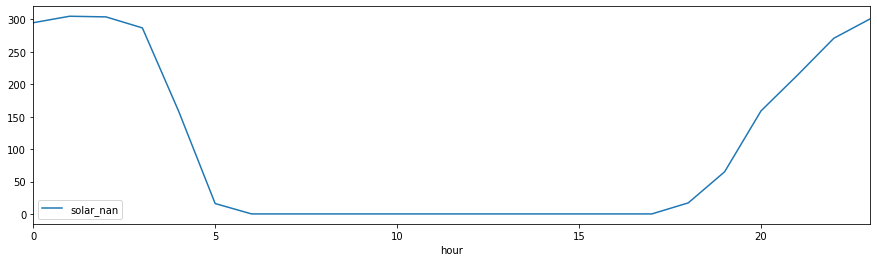

In [27]:
energy["solar_nan"] = energy["solar"].map(lambda x: 1*(np.isnan(x)))

energy.groupby("hour").sum()[["solar_nan"]].plot(figsize=(15, 4))

It looks clear that the NaN values in the solar timeseries correspond with nighttime hours. That's why there are so many NaN values!

#### Calculate the total income for each type of power generation and total costs for consumption (4 p) 
Return a dictionary like the following one:

{ "consumption": cost_consumption, "wind": income_wind, "solar": income_solar, "gas": income_gas, ...} 

In [28]:
# Income = energy_generated * price
# Cost = energy_bought * price

dict_cost_income = {}
features_not_price = [feature for feature in features if feature != "spot_price"]

for col in features_not_price:
    dict_cost_income[col] = np.sum(energy[col] * energy["spot_price"])
    
dict_cost_income

{'power_demand': 12115827296.223999,
 'nuclear': 2674992442.1679997,
 'gas': 2577997502.639,
 'solar': 430157479.785,
 'hydro': 1179143190.696,
 'coal': 591516973.36,
 'wind': 2412917661.565}

#### Create two plots: (2 p)
* Hourly average power demand
* Hourly average spot price

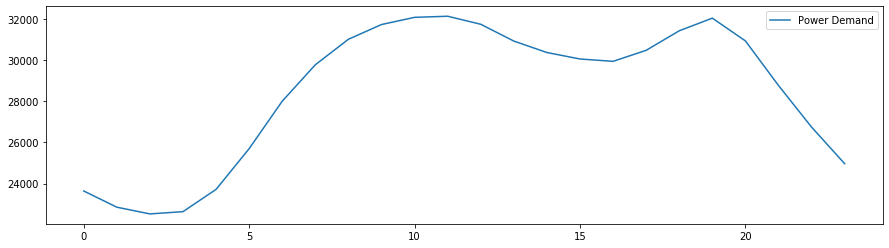

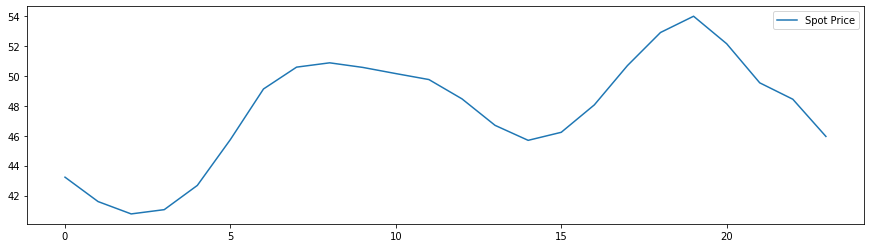

In [29]:
df_avg = energy.groupby("hour").mean()[["power_demand", "spot_price"]]

plt.figure(figsize=(15, 4))
plt.plot(df_avg.index, df_avg["power_demand"], label="Power Demand")
plt.legend()
plt.show()

plt.figure(figsize=(15, 4))
plt.plot(df_avg.index, df_avg["spot_price"], label="Spot Price")
plt.legend()
plt.show()

#### Create a categorical variable called "wind_category" using the "wind" column (2 p)
Create 3 categories: low, mid, high

In [30]:
# low, mid, high

energy["wind_category"] = pd.cut(energy["wind"], bins=3, labels=["low", "mid", "high"])
energy.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,date,year,month,day,hour,weekday,weekend,season,solar_nan,wind_category
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018-12-31,2018,12,31,23,0,False,winter,0,low
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019-01-01,2019,1,1,0,1,False,winter,0,low
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019-01-01,2019,1,1,1,1,False,winter,0,low
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019-01-01,2019,1,1,2,1,False,winter,0,low
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019-01-01,2019,1,1,3,1,False,winter,0,low


#### Which is the power generation type that has generated the most energy? And the least? (2 p)

In [31]:
energy_generators = ["nuclear", "gas", "solar", "hydro", "coal", "wind"]

energy[energy_generators].sum().sort_values(ascending=False)

nuclear    55758093.0
wind       53052571.9
gas        51760818.5
hydro      24492328.2
coal       10854073.8
solar       8878077.8
dtype: float64

According to results, Nuclear power is the type of energy that produces the most, and solar power the one that produces the least!